타이타닉 탑승자 명단을 통해 생존자 분석 – 디카프리오는 정말 살 수 없었을까?


데이터 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
raw_data = pd.read_excel(titanic_url)
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


생존률 확인

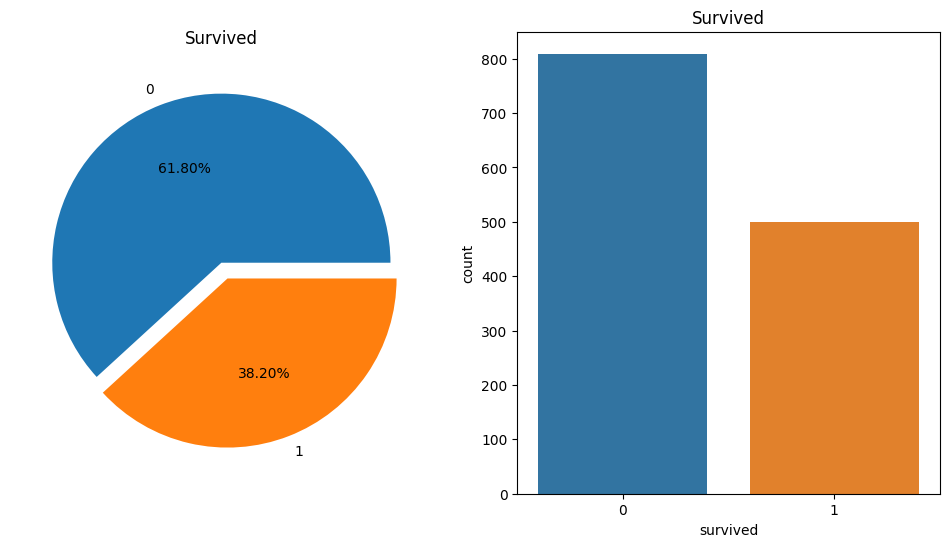

In [2]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()


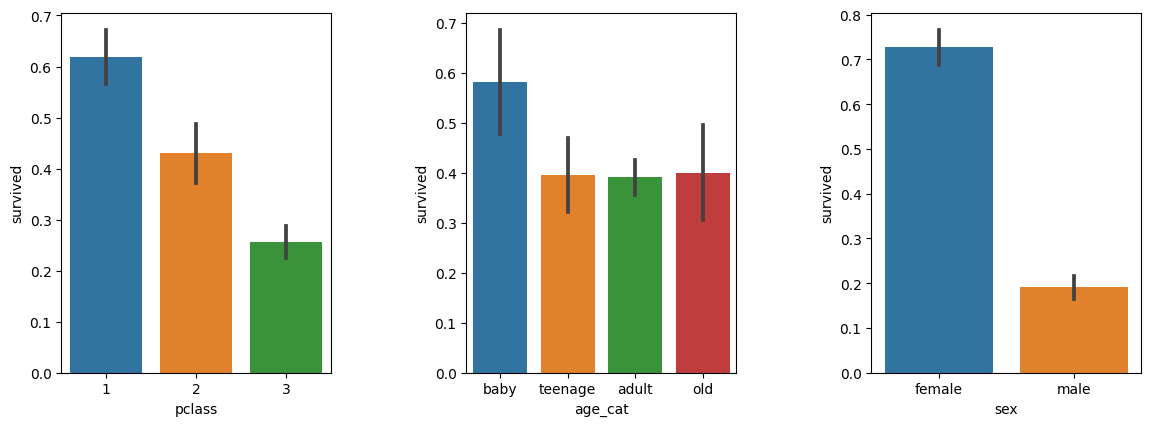

In [3]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100],
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot(x='pclass',y='survived', data=raw_data)
plt.subplot(132)
sns.barplot(x='age_cat',y='survived', data=raw_data)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()


데이터 전처리

In [4]:
#여성을 1로 남성을 0으로 두고, 몇몇 데이터를 float형으로 선언하고, nan이 있는 데이터는 제거
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


데이터셋 생성하기 - 데이터 선별

In [5]:
#학습 데이터, 테스트 데이터(10%) 선별

#pclass : 객실 등급
#survived : 생존 유무
#sex : 성별
#age : 나이
#sibsp : 형제 혹은 부부의 수
#parch : 부모, 혹은 자녀의 수
#fare : 지불한 운임
#boat : 탈출한 보트가 있다면 boat 번호

x_data = raw_data.values[:, [0,3,4,5,6,8]]
y_data = raw_data.values[:, [1]] #survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1, random_state=7) #0.1이면 9:1러 나누겠다는 뜻

print(y_train.size)
print(y_test.size)


940
105


모델 구성하기

In [6]:
import tensorflow as tf
import keras
# from keras.models import Sequential
# from keras.layers.core import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
np.random.seed(7)

model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))


모델 그려보기

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 255)               1785      
                                                                 
 dense_3 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2041 (7.97 KB)
Trainable params: 2041 (7.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


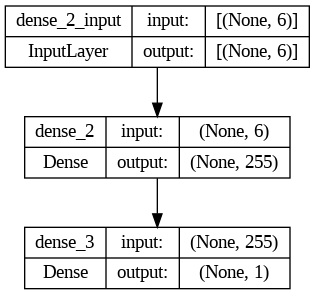

In [7]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


학습과정 모델 설정하기

In [8]:
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])


모델 학습시키기

In [9]:
X_train =  tf.convert_to_tensor(X_train, np.float64)
X_test =  tf.convert_to_tensor(X_test, np.float64)
y_train =  tf.convert_to_tensor(y_train, np.float64)
y_test =  tf.convert_to_tensor(y_test, np.float64)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)



Epoch 1/500
30/30 [==============================] - 1s 12ms/step - loss: 0.2515 - accuracy: 0.6543 - val_loss: 0.2218 - val_accuracy: 0.7048
Epoch 2/500
30/30 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.6862 - val_loss: 0.1993 - val_accuracy: 0.7048
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1962 - accuracy: 0.7266 - val_loss: 0.1795 - val_accuracy: 0.7714
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.7372 - val_loss: 0.1737 - val_accuracy: 0.8000
Epoch 5/500
30/30 [==============================] - 0s 6ms/step - loss: 0.1834 - accuracy: 0.7319 - val_loss: 0.1704 - val_accuracy: 0.7810
Epoch 6/500
30/30 [==============================] - 0s 5ms/step - loss: 0.1730 - accuracy: 0.7617 - val_loss: 0.1650 - val_accuracy: 0.7905
Epoch 7/500
30/30 [==============================] - 0s 6ms/step - loss: 0.1780 - accuracy: 0.7479 - val_loss: 0.2232 - val_accuracy: 0.6667
Epoch 8/500


학습결과 그리기

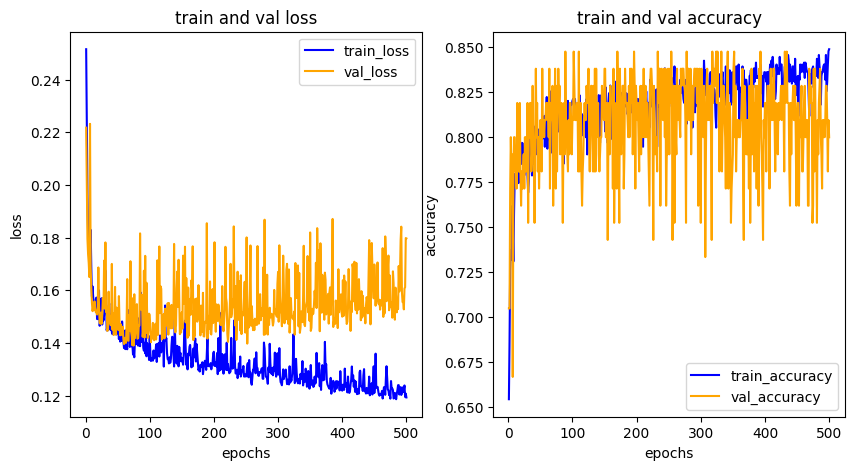

In [10]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


모델 평가하기

In [11]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


4/4 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.8000
accuracy: 80.00%


디카프리오는 정말 살 수 없었을까?

In [12]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6) #3등실 탑승, 남성, 19살, 형제없고, 부모나 자녀없음, 싼 가격으로 표를 삼
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6) #1등실 탑승, 여성, 17살,  운임은 비싸게 주었고, 부모와 함께 탑승하고, 약혼자도 있었다



In [13]:
model.predict(dicaprio) #어차피 죽을 운명


1/1 [==============================] - 0s 59ms/step


array([[0.13645327]], dtype=float32)

In [14]:
model.predict(winslet) #어차피 살 운명


1/1 [==============================] - 0s 28ms/step


array([[0.9999322]], dtype=float32)

나는 살았을까?

In [15]:
me = np.array([2., 0., 23., 1., 2., 50.]).reshape(1,6) #2등실 탑승, 남성, 23살, 형제있고, 부모나 자녀있음, 반값으로 표를 삼

In [16]:
model.predict(me)

1/1 [==============================] - 0s 17ms/step


array([[0.1019753]], dtype=float32)